In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import files

uploaded = files.upload()
file_name = "tesla_stock_data.csv"
df = pd.read_csv(file_name)

Saving tesla_stock_data.csv to tesla_stock_data (1).csv


In [3]:
print(df.head())
print(df.info())
print(df.columns)

        Price               Close                High                 Low  \
0      Ticker                TSLA                TSLA                TSLA   
1        Date                 NaN                 NaN                 NaN   
2  2020-01-02   28.68400001525879  28.713333129882812   28.11400032043457   
3  2020-01-03  29.534000396728516  30.266666412353516  29.128000259399414   
4  2020-01-06    30.1026668548584  30.104000091552734  29.333332061767578   

                 Open     Volume  
0                TSLA       TSLA  
1                 NaN        NaN  
2  28.299999237060547  142981500  
3  29.366666793823242  266677500  
4  29.364667892456055  151995000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1008 non-null   object
 1   Close   1007 non-null   object
 2   High    1007 non-null   object
 3   Low     1007 non-null   object
 4   

In [4]:
df = df.dropna()  # ลบแถวที่มีค่า NaN
df = df.iloc[1:]  # ลบแถวแรกที่อาจมี header ซ้ำซ้อน

In [5]:
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
print(df.head())

         Date               Close                High                 Low  \
2  2020-01-02   28.68400001525879  28.713333129882812   28.11400032043457   
3  2020-01-03  29.534000396728516  30.266666412353516  29.128000259399414   
4  2020-01-06    30.1026668548584  30.104000091552734  29.333332061767578   
5  2020-01-07  31.270666122436523  31.441999435424805  30.224000930786133   
6  2020-01-08   32.80933380126953     33.232666015625  31.215333938598633   

                 Open     Volume  
2  28.299999237060547  142981500  
3  29.366666793823242  266677500  
4  29.364667892456055  151995000  
5  30.760000228881836  268231500  
6  31.579999923706055  467164500  


In [6]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # แปลง Date
df = df.set_index("Date")  # ตั้งให้ Date เป็น index
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1006 non-null   object
 1   High    1006 non-null   object
 2   Low     1006 non-null   object
 3   Open    1006 non-null   object
 4   Volume  1006 non-null   object
dtypes: object(5)
memory usage: 47.2+ KB
None


In [7]:
df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)
print(df.dtypes)

Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object


In [8]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
svm_model = SVR(kernel="linear", C=500, gamma="scale")
svm_model.fit(X_train_scaled, y_train)

SVR(C=500, kernel='linear')

In [65]:
joblib.dump(svm_model, "svm_tesla_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [67]:
y_pred = svm_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1.84
MSE: 5.48
RMSE: 2.34


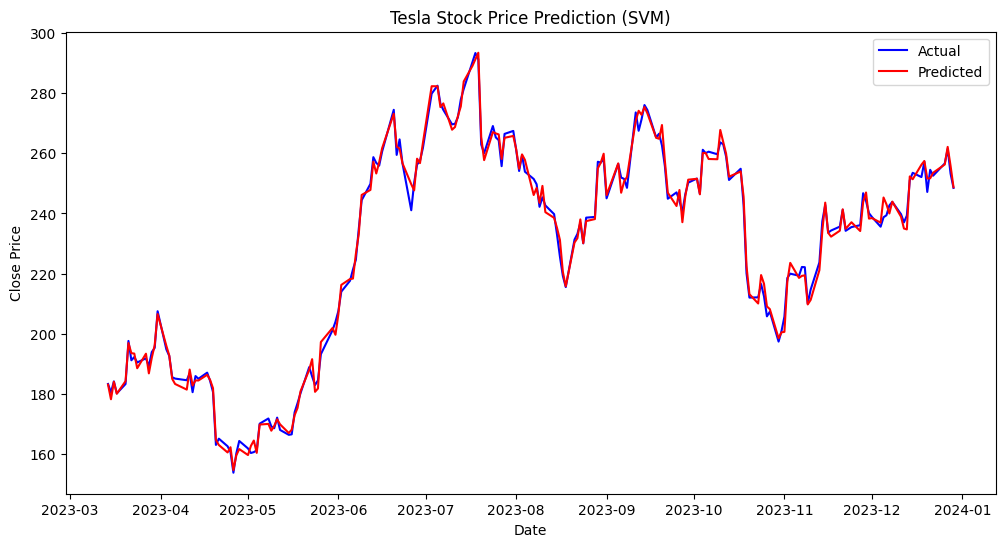

In [68]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Tesla Stock Price Prediction (SVM)")
plt.legend()
plt.show()

In [69]:
import joblib

joblib.dump(svm_model, "svm_tesla_model.pkl")
print("success")

success


In [70]:
from google.colab import files

files.download("svm_tesla_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
from google.colab import files

files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>